In [292]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import pickle
from tabulate import tabulate

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


# Part 1- Data exploration

In this part, we explored the data set given to us for first impressions which include the data frame size, the data content
and distribution for each column, amount of Nulls, and label ditribution.

In [293]:
df_train=pd.read_csv('train.csv')

In [294]:
df_test= pd.read_csv('test_without_target.csv')

In [295]:
#Size of train data
print('Dataset train size: ', df_train.shape)
df_train.head()


Dataset train size:  (22161, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,...,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787,1
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,...,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883,0
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,...,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903,0
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,...,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830,0
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,...,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922,0


In [296]:
df_train[['10','11','12','13','14','15','16']].head()

,10,11,12,13,14,15,16
0,0.702957,1024.1,1025.9,0,0.6mm,32.0,13.9
1,0.223911,1005.3,1008.1,0,0.0mm,50.0,18.6
2,0.180848,1020.8,1026.5,0,0.0mm,NaN,16.5
3,0.181289,1021.9,1019.8,0,0.8mm,88.0,14.2
4,0.237347,1005.3,1007.8,0,0.0mm,112.0,26.6


Looking at the Dataframe size, we can already identify that the ratio between the amount of columns and rows is not as desired (N columns for N^2 rows). More so, we can start sorting the columns between numeric and catagorial columns and Identify columns that are need to be 'cleaned', thus from the head table. 

In [297]:
#Size of test data
print('Dataset test size: ', df_test.shape)
df_test.head()

Dataset test size:  (7387, 26)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,1.534361,12.002415,2.6,67.0,97.0,F,a11,1.600000,0.650000,...,105.0,21.5,12.2,F,H,52.0,33.0,2012,70.0,354.720533
1,1,1.632953,14.821694,3.6,72.0,78.0,M,a18,1.942857,1.328571,...,34.0,25.0,24.3,P,D,24.0,11.0,2012,40.0,120.529466
2,2,2.330694,21.399766,5.4,64.0,53.0,A,a20,1.864286,0.992857,...,102.0,23.7,22.8,C,O,39.0,31.0,2011,70.0,294.533370
3,3,2.560304,21.744331,5.8,20.0,71.0,N,a18,2.457143,1.257143,...,124.0,33.7,26.0,N,I,35.0,13.0,2012,60.0,57.037532
4,4,1.391859,18.158369,4.8,44.0,42.0,F,a3,1.285714,0.892857,...,84.0,16.1,15.4,M,M,43.0,20.0,2012,200.0,178.457573


we can see that we have the same amount of columns (features) at both data sets

In [298]:
df_train.describe()

,0,1,2,3,4,7,8,9,10,11,12,15,16,17,20,21,22,23,24,label
count,22161.000000,22161.000000,22161.000000,22102.000000,22057.000000,22154.000000,22143.000000,22161.000000,22161.000000,22055.000000,22048.000000,20290.000000,22133.000000,22109.000000,20816.000000,22062.000000,22161.000000,22061.000000,22061.000000,22161.000000
mean,2.185958,19.797754,4.929620,51.547009,68.497982,1.648476,0.888041,6.429358,0.228284,1015.347014,1017.708572,73.685017,21.617133,17.065837,39.995484,19.101577,2010.945264,146.971579,224.835441,0.236451
std,0.815080,10.763614,3.572644,20.184353,18.231315,0.480275,0.461375,3.381488,0.161565,7.011856,7.085807,37.866780,6.602743,6.409174,13.150807,8.546933,0.823740,86.609704,160.801099,0.424912
min,-0.490607,2.437300,0.000000,1.000000,3.000000,0.450000,-0.492857,1.000000,-0.195661,984.500000,983.700000,0.000000,3.900000,-0.700000,11.000000,0.000000,2010.000000,0.000000,0.001355,0.000000
25%,1.622068,12.268371,2.400000,37.000000,57.000000,1.271429,0.542857,3.000000,0.136002,1010.600000,1013.000000,45.000000,16.500000,12.100000,31.000000,13.000000,2010.000000,90.000000,100.144819,0.000000
50%,2.167701,17.833216,4.200000,52.000000,69.000000,1.607143,0.864286,7.000000,0.206457,1015.300000,1017.700000,82.000000,21.000000,16.600000,39.000000,19.000000,2011.000000,130.000000,199.866581,0.000000
75%,2.720341,25.196446,6.600000,65.000000,82.000000,2.007143,1.242857,9.000000,0.278929,1020.000000,1022.400000,104.000000,26.400000,21.800000,48.000000,24.000000,2012.000000,200.000000,316.118054,0.000000
max,9.092011,248.877854,81.200000,100.000000,100.000000,3.435714,2.128571,12.000000,0.954076,1038.900000,1040.900000,143.000000,46.100000,36.900000,135.000000,69.000000,2012.000000,670.000000,1426.459838,1.000000


From the describe table, we can notice the mean, meadian and ditribution for each column, thus hinting that we will be needing to normalize the data ( different scales) and outlier removal.

In [299]:
#learning about missing values at train data
nrows=df_train.shape[0]
pd.DataFrame({'total_missing': df_train.isnull().sum(), 'perc_missing': (df_train.isnull().sum()/nrows)*100})

,perc_missing,total_missing
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.266233,59
4,0.469293,104
5,6.087270,1349
6,0.000000,0
7,0.031587,7
8,0.081224,18
9,0.000000,0


From the Null table, we can notice that we have certain columns with a significant amount of null, hinting us the we will be needing to deal with them in the future.

In [300]:
#learning about data and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
0        22161 non-null float64
1        22161 non-null float64
2        22161 non-null float64
3        22102 non-null float64
4        22057 non-null float64
5        20812 non-null object
6        22161 non-null object
7        22154 non-null float64
8        22143 non-null float64
9        22161 non-null int64
10       22161 non-null float64
11       22055 non-null float64
12       22048 non-null float64
13       22161 non-null object
14       22161 non-null object
15       20290 non-null float64
16       22133 non-null float64
17       22109 non-null float64
18       21951 non-null object
19       21141 non-null object
20       20816 non-null float64
21       22062 non-null float64
22       22161 non-null int64
23       22061 non-null float64
24       22061 non-null float64
label    22161 non-null int64
dtypes: float64(17), int64(3), object(6)
memory usage: 4.4+ MB


Furthur column exploration, Knowing the type of data for each column gives us better tools for for the pre processing element. We can already notice that columns 5,6,13,14,18,19 ae object type and might be catagorial.

Number 1 clasifications: 5240
Number 0 clasifications: 16921


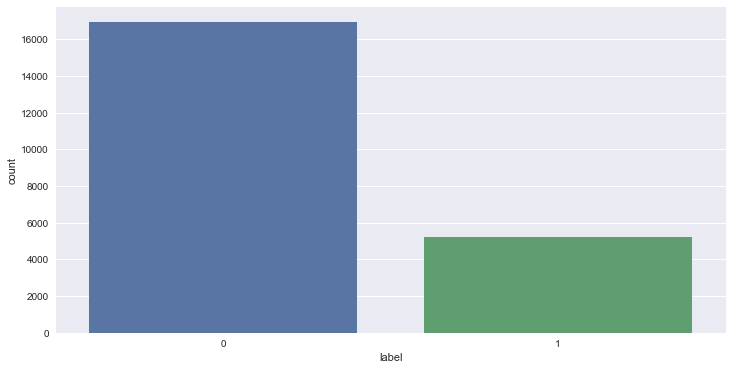

In [301]:
y = df_train.label  
sns.countplot(y)
z,o=y.value_counts()
print('Number 1 clasifications:', o)
print('Number 0 clasifications:', z)


Label distribution of the data. We can see that 76% of the data is labeled as 0, where only 24% is labeled 1. this is an 'Unbalanced' data set, which can effect our model predictions.

In [302]:
df_train2=df_train.copy()

In [303]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()
    plt.show()

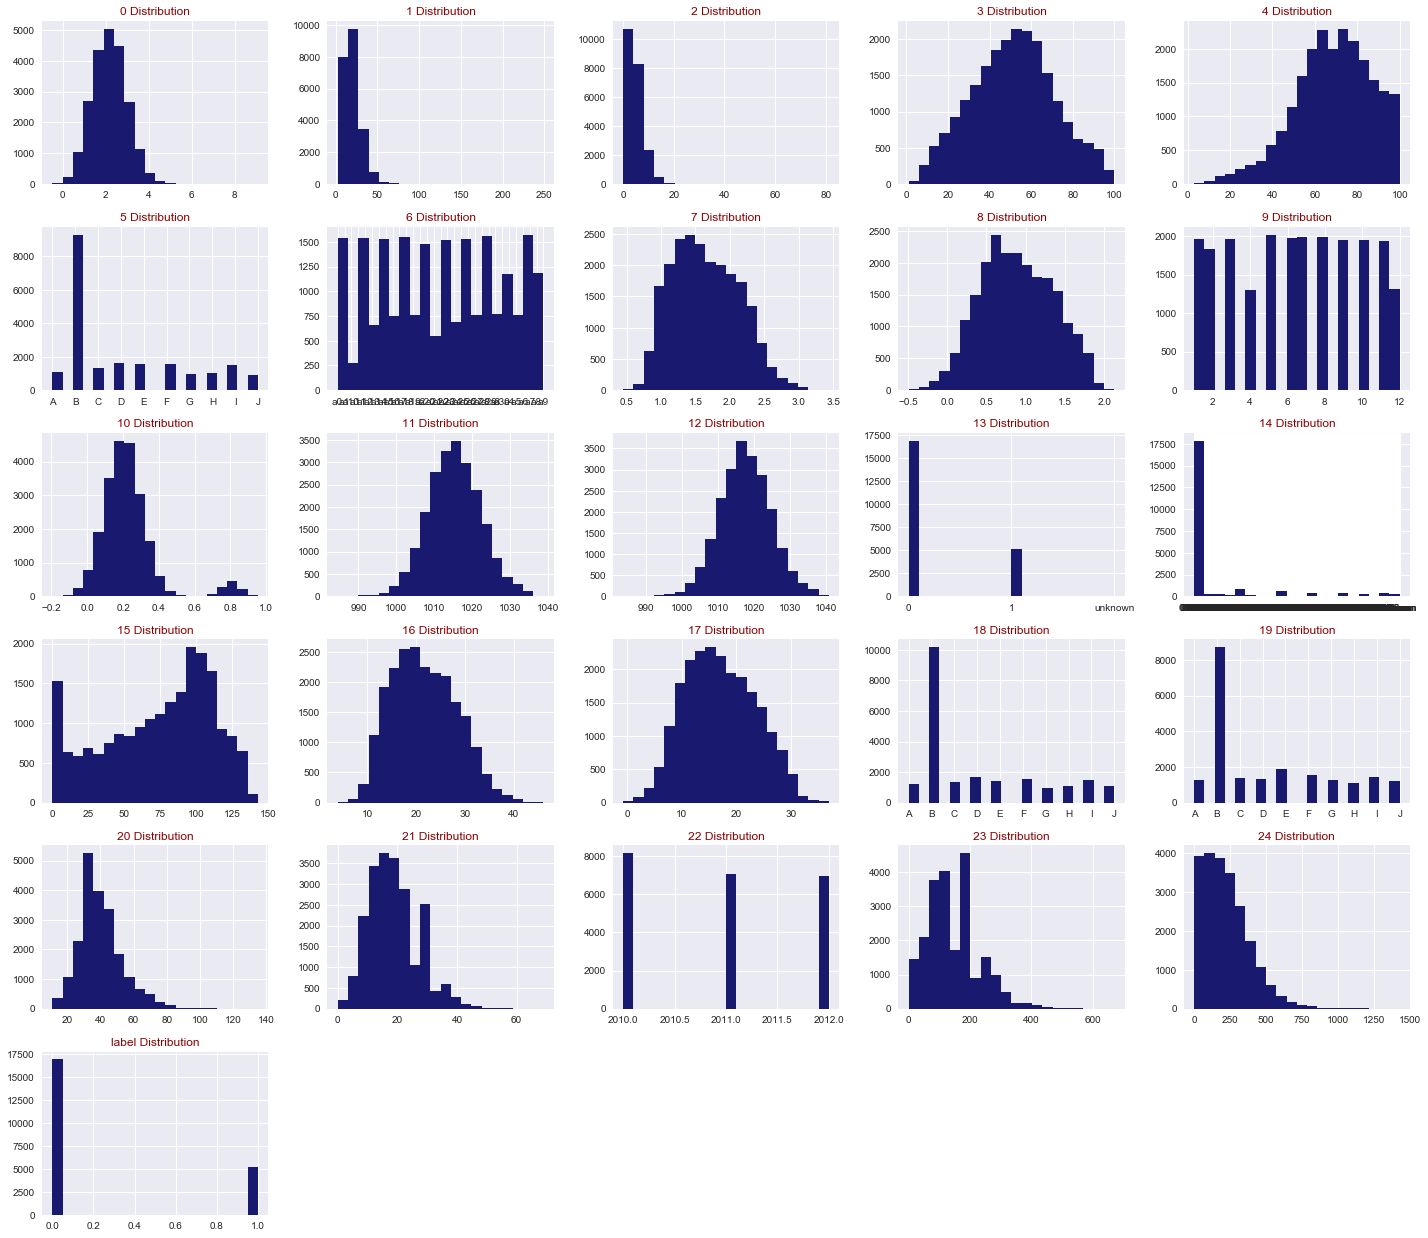

In [304]:
#learning about the distribution of the features
draw_histograms(df_train,df_train.columns,7,5)

Plotting the data gave us a first impression of the distribution and if the data is numeric/catagorial and specificly 
normal/ non-normal distribution for the numeric columns. We can see that columns 5,6,9,13,18,19 and 22 could be catagorial.

In [305]:
def categoric_hist(dataframe, features, rows, cols):
        fig=plt.figure(figsize=(10,10))
        for i, feature in enumerate(features):
            ax=fig.add_subplot(rows,cols,i+1)
            plt.title(features[i])   
            dataframe[feature].value_counts().sort_index().plot.bar()
        fig.tight_layout()    
        plt.show()

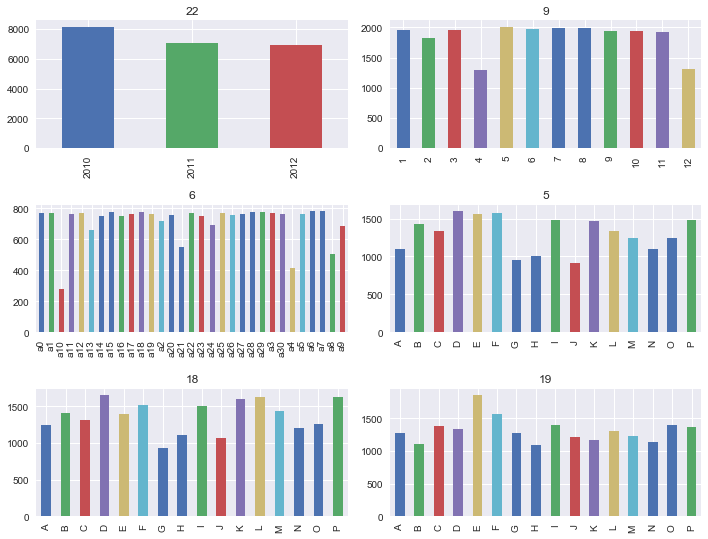

In [306]:
#learning about the distribution of the features
categoric_hist(df_train,['22','9','6','5','18','19'],4,2)

Furthur plotting of the catagorial columns for better observation. with the information we have acknowledged 
previously we can see that column 13 is binaric type and column 14 is date type. we have decided to identify these
columns as catagorial with the others.

# Part 2 - PreProcessing


#### `Cleaning` the data of columns 13,14 and transforming it to a numeric / Binaric column

In [307]:
#managing the columns that have strings with numbers
def slice_str(text):
    return float(text[:-2])

df_train['13']=df_train['13'].replace(to_replace='unknown',value=np.nan)
df_train.dropna(subset=['13'],  inplace=True)
def to_int(text):
    return int(text)

In [308]:
df_train['14']=df_train['14'].apply(slice_str)

In [309]:
df_train['13']=df_train['13'].apply(to_int)

From part 1 we could see that for column 13 we needed to replace 'unknown' with null and for column 14, we needed to remove the 'MM'. Because of the insignificant amount of Null in column 13, we removed them.

#### Checking the corrilation between columns and dropping columns with a corrilation over 0.88

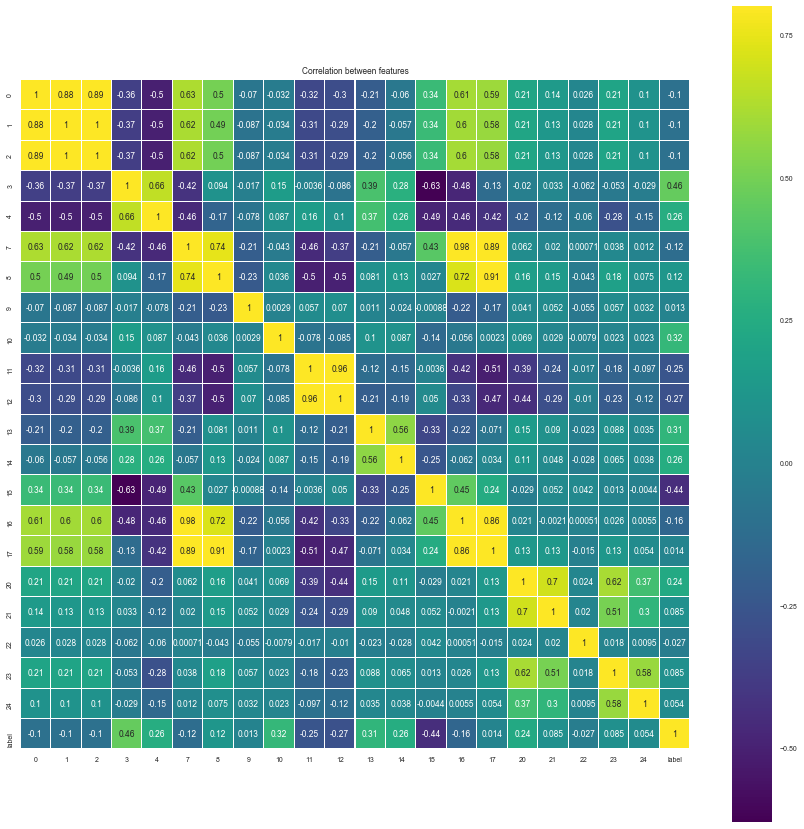

In [310]:
#learning about correlation between features
corrMatrix=df_train.corr()
sns.set(font_scale=0.7)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [311]:
# Feature selection- correlation over 0.88
for_test=[]
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if abs(corrMatrix.iloc[i,j]) >= 0.88:
            column= f'{j}'
            if columns[j]:
                columns[j]= False
                df_train=df_train.drop([column],axis=1)
                for_test.append(column)

As part of dealing with the Dimensional problem which we identified in the first part, we looked for high corrilation between columns which would let us remove them. After creating the Heatmap, we decided to use the 0.88 threshold as an indicator for corrilated colunm. Columns 1,2,10,14,15 were removed


#### Separating the numeric columns from Object columns

In [312]:
#handeling the null values for the numeric columns and object columns
numeric_columns = df_train.select_dtypes(include=['number']).drop(['label','13','22','9'], axis = 1).columns
# Saving a copy of the data for test
df_for_test = df_train.copy()

For convenience, we seperated the numeric columns from the catagorial columns. We identified columns 5,6,9,13,18,19 and 22 as catagorial, while the others are numeric.

#### Plotting the columns with box plot before cleaning outliers and normalizing

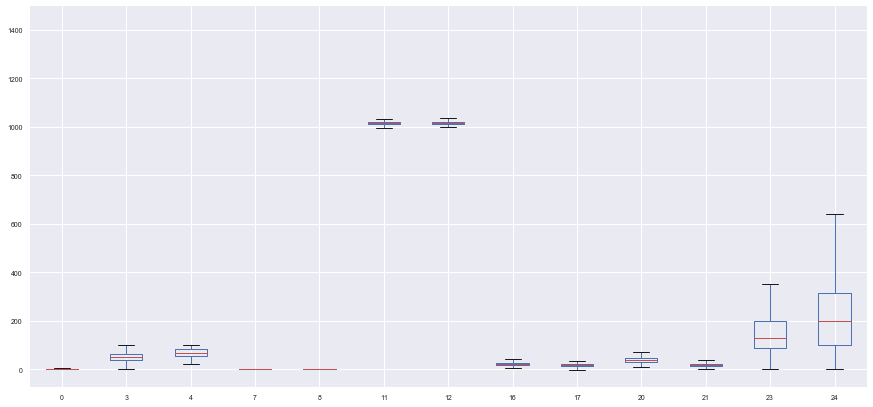

In [313]:
#plotting before iutliers removal and normalization
df_train[numeric_columns].boxplot(figsize = (15,7))

We can see as we preddicted already in part 1 that there are outliers whom need to be removed and columns that need to be normalized to the same scale. Failing to do so could create inaccurate distribution after noramlizing (outliers) and could creat a 1 dimensional problem if one columns data is significtly bigger than the others.

#### Dealing with Outliers


Firstly, We looked at the ditribution of each numeric column to try and identify if these are normal or non- normal distributions.

In [314]:
def draw_histograms1(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(dataframe[feature].dropna())
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()
    plt.show()

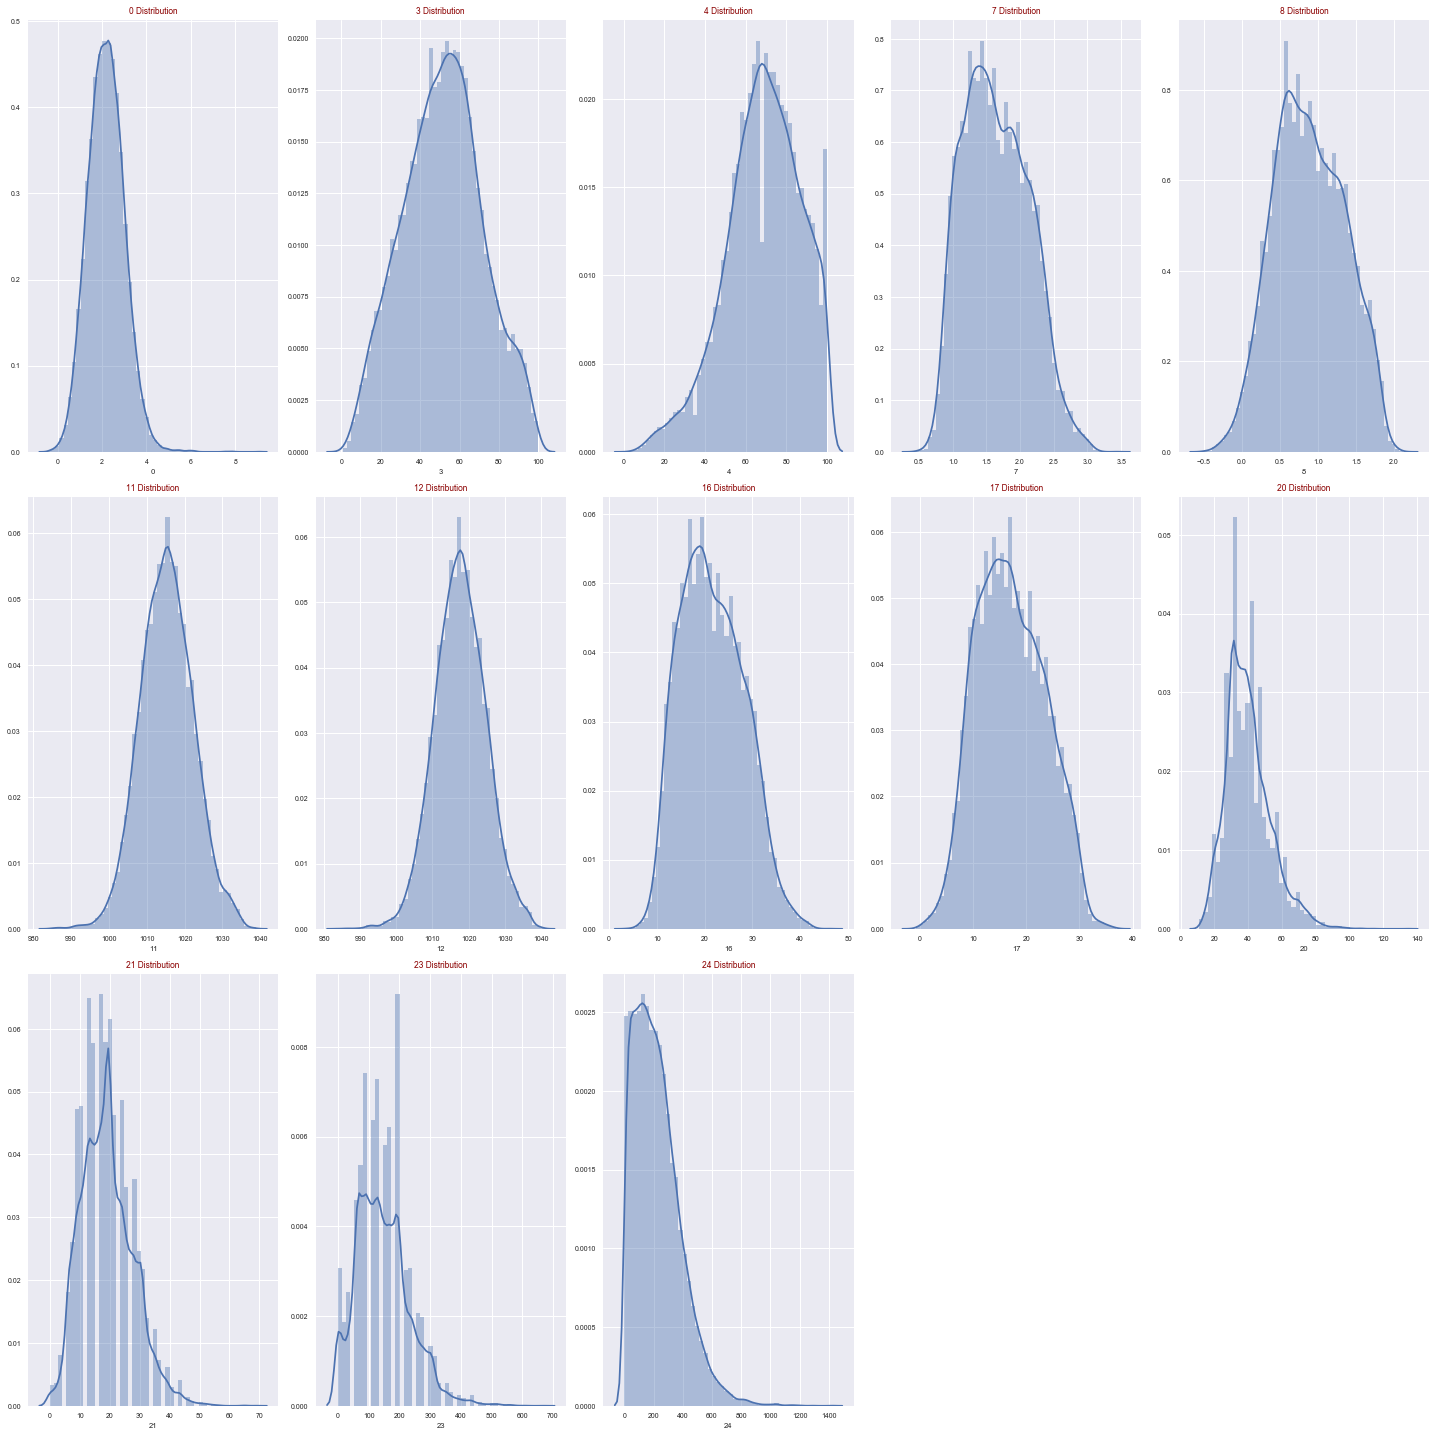

In [315]:
#draw_histograms(df_train[numeric_columns],df_train[numeric_columns].colums,3,5)
draw_histograms1(df_train,df_train[numeric_columns].columns,3,5)
#sns.distplot(df_train[numeric_columns[-1]])

We can see that columns 0,3,7,8,11,12,16,17 and 24 are normal while 4,20,21,23 are non normal columns. For the normal distribution columns, we used standerd deviation method to remove outliers, while for the non-normal columns, we used IQR method to remove outliers.

In [316]:
# drop outliers for normal distrebution columns using standerd deviation
df_train=df_train[df_train[['0','3','7','8','11','12','16','17','24']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


In [317]:
# drop outliers for normal distrebution columns using IQR
Q1 = df_train[['4','20','21','23']].quantile(0.25)
Q3 = df_train[['4','20','21','23']].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[~((df_train[['4','20','21','23']] < (Q1 - 1.5 * IQR)) |(df_train[['4','20','21','23']] > (Q3 + 1.5 * IQR))).any(axis=1)]



#### comparing mean with meadian score after outlier removal

In [318]:
df_train[numeric_columns].describe()

,0,3,4,7,8,11,12,16,17,20,21,23,24
count,20274.000000,20274.000000,20242.000000,20274.000000,20274.000000,20274.000000,20274.000000,20274.000000,20274.000000,19123.000000,20268.000000,20274.000000,20274.000000
mean,2.150849,52.040397,69.455933,1.641564,0.882088,1015.779087,1018.169745,21.552387,16.949487,38.086911,18.294948,137.781888,210.973486
std,0.777910,19.647533,17.295848,0.467332,0.464804,6.749209,6.789891,6.415983,6.358339,10.815845,7.701853,76.103938,142.347202
min,-0.227967,3.000000,20.000000,0.450000,-0.492857,994.700000,996.700000,4.300000,-0.700000,11.000000,0.000000,0.000000,0.001355
25%,1.608095,38.000000,58.000000,1.271429,0.535714,1011.100000,1013.500000,16.500000,12.000000,31.000000,13.000000,90.000000,96.193784
50%,2.144556,52.000000,70.000000,1.607143,0.857143,1015.600000,1018.000000,21.000000,16.600000,37.000000,19.000000,130.000000,191.518385
75%,2.684530,65.000000,82.000000,1.992857,1.242857,1020.300000,1022.800000,26.300000,21.700000,44.000000,24.000000,190.000000,301.623379
max,4.625200,100.000000,100.000000,3.071429,2.050000,1036.000000,1038.800000,41.400000,35.700000,67.000000,39.000000,350.000000,706.303201


#### Dealing with null values

In [319]:
# For the numeric columns, filling with mean after outliers removal
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())

We decided to fill all the numeric columns with the mean of each columns since it is almost similar to the meadian (from the describe table in part 1), while ignoring the null rows for the catagorial since there is an even disributions between the catagories for each column, and randomnly entering data could harm the accuracy of the model.

#### Normalizing the data after removing outliers

After filling Nulls and removing outliers, we normalized the data to the same scale so no Dimension (column) will overlook the others.

In [320]:
# normalizing the data between 0-1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

#### Plotting the numeric columns with boxplot  after preprocessing

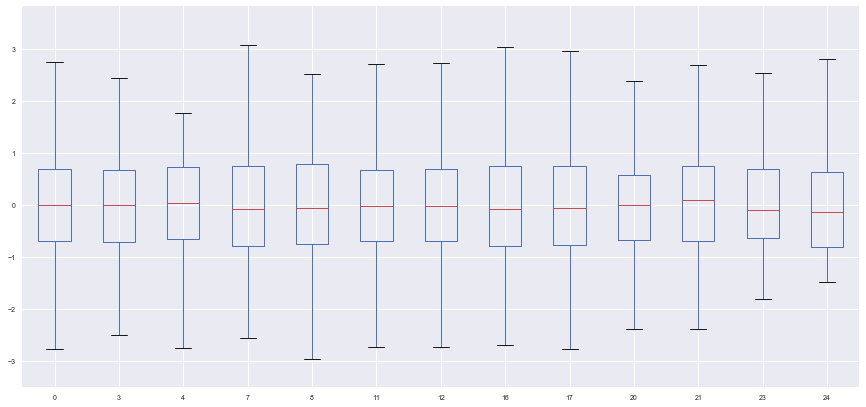

In [321]:
df_train[numeric_columns].boxplot(figsize = (15,7))

#### Handeling the categorical data (6 columns) by using Dummy Variables

In [322]:
def dummies(df, cols):
    a = pd.get_dummies(df[cols])
    frames = [df, a]
    df = pd.concat(frames, axis = 1)
    df = df.drop(columns = cols)
    return df

In [323]:
df_train= dummies(df_train,['5','13','18','19','6','22','9']) 

After dealing with the numeric columns, we decided to deal with the catagorial columns using dummies method. This method create a new column for each catagory for in each column, and fills the rows with binary values (1 if holds catagory in original column and 0 if not). This is a way to give the catagorial columns a representation in the models.

## PCA For Train Set


Seperating the label column from the rest of the column so we can use the PCA method to reduce the dimensions amd train the models.

In [324]:
#defining data and labels
y_label= np.array(df_train['label'])
data=df_train.drop(['label'], axis = 1)

We used the PCA method to reduce the dimensions of the data set while still keeping 95% variance.The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data. As mentioned earlier, we seperated the numeric columns from the catagorial columns, and used the PCA method on each. For each PCA, we displayed a graph showing how much each component contributes to describing the data, and drew a threshold line at 95%. After finding the necessary anount of components, we applied the PCA on both data sets (numeric and catagorial) and merged them back to one dataset.

In [325]:
# pca - calculate the explained variance for each feature

#for the numeric columns
pca1 = PCA(n_components = data.loc[:, :'24'].shape[1]) 
pca1.fit(data.loc[:, :'24'])
new_data1 = pca1.transform(data.loc[:, :'24'])

#for the Dummy columns
pca2=PCA(n_components = data.loc[:, '5_A':].shape[1])
pca2.fit(data.loc[:, '5_A':])
new_data2= pca2.transform(data.loc[:, '5_A':])


#pca1.explained_variance_ratio_
#pca2.explained_variance_ratio_

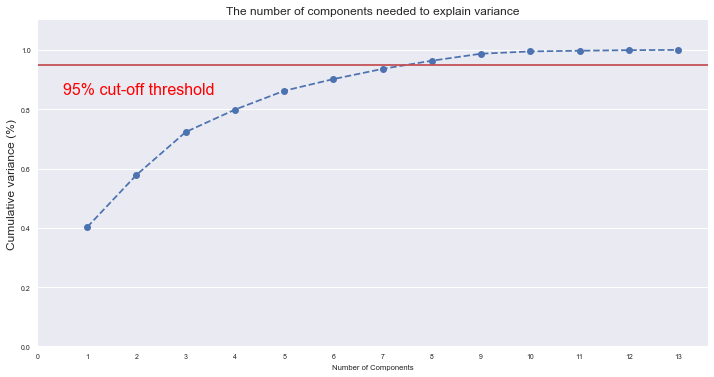

In [326]:
#searching for the best number of components for the numeric columns
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, (data.loc[:, :'24'].shape[1]+1), step=1)
y = np.cumsum(pca1.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, (data.loc[:, :'24'].shape[1]+1), step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)',fontsize=12)
plt.title('The number of components needed to explain variance',fontsize=12)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')


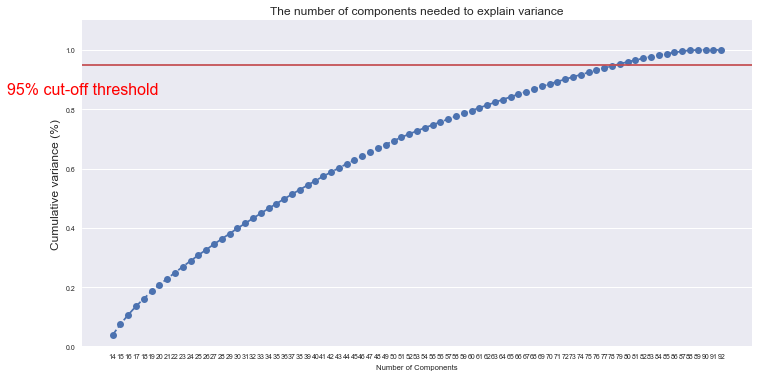

In [327]:
#searching for the best number of components for the Dummy columns
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange((data.loc[:, :'24'].shape[1]+1),(data.loc[:, :'24'].shape[1])+ (data.loc[:, '24':].shape[1]), step=1)
y = np.cumsum(pca2.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange((data.loc[:, :'24'].shape[1]+1), (data.loc[:, :'24'].shape[1])+ (data.loc[:, '24':].shape[1]), step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)',fontsize=12)
plt.title('The number of components needed to explain variance',fontsize=12)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')


In [328]:
# implementing the pca on data
pca1 = PCA(n_components = 8)
pca1.fit(data.loc[:, :'24'])
new_data1 = pca1.transform(data.loc[:, :'24'])


pca2 = PCA(n_components = 66)
pca2.fit(data.loc[:, '5_A':])
new_data2= pca2.transform(data.loc[:, '5_A':])


print (sum(pca1.explained_variance_ratio_) )#make sure we reach the 95%
print(sum(pca2.explained_variance_ratio_) )#make sure we reach the 95%

0.9636007146766766
0.9529412354113509


As displayed, the minimal number of components needed for the numeric column dataset to decribe 95% of the data is 8, and the number of components needed for the catagorial column dataset to decribe 95% of the data is 66.

In [329]:
new_data= np.concatenate((new_data1,new_data2),axis=1)

We used the clustring method to create a mathematical manipulation on data, thus creating a new column by picking to random columns and multipling them. Addind a new column with corrilation to other columns will help

In [330]:
# adding a new feature to train dataset
x = new_data[:,16]
y = new_data[:,7]
new_train_column = np.multiply(x,y)
new_data = np.concatenate((new_data, np.vstack(new_train_column)), axis = 1)

## Preprocessing the test set

After completing the pre processing of the train data set, we need to preprocess the test data set so it could be used to test the chosen model. We made sure not to use any new assumption from the test data, so there wont be any data leakage.

In [331]:
# Dropping corrilated columns
for i in for_test:
    df_test= df_test.drop(i,axis=1)

#slicing the string from numeric-string combination
df_test['13']= df_test['13'].replace(to_replace='unknown',value=np.nan)
df_test['13'] = df_test['13'].astype('f')
df_test.dropna(subset=['13'],  inplace=True)

# Seperating numeric and catagorical columns
numeric_columns = df_for_test.select_dtypes(include=['number']).drop(['label','13','22','9'], axis = 1).columns
# dropping outliers for normal distribution
df_test=df_test[df_test[['0','3','7','8','11','12','16','17','24']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# dropping outliers for non - normal distribution
df_test = df_test[~((df_test[['4','20','21','23']] < (Q1 - 1.5 * IQR)) |(df_test[['4','20','21','23']] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Dealing with null values
df_test[numeric_columns] = df_test[numeric_columns].fillna(df_for_test[numeric_columns].mean())

#normalization
df_test[numeric_columns] = scaler.fit_transform(df_test[numeric_columns])
#adding dummy varienales instead categorical values
df_test= dummies(df_test,['5','18','19','13','6','22','9']) #for test data

# implementing the pca on data
new_test1 = pca1.transform(df_test.loc[:,'0' :'24'])
new_test2= pca2.transform(df_test.loc[:, '5_A':])

new_test=np.concatenate((new_test1,new_test2),axis=1)

# No need to drop corrilation columns
# adding a new feature
z = new_test[:,16]
w = new_test[:,7]
new_test_column = np.multiply(z,w)
new_test = np.concatenate((new_test, np.vstack(new_test_column)), axis = 1)


# Part 3 and 4 - Model assessing  

## K-Fold 

The K-fold function purpose is to display the average AUC for a given model, via seperating the data into train and validation K amount of times and calculating the average AUC (ROC curve) for the train set and valedation set (we used k=13, thus looking for a number around 10 which is the default when not knowing the exact amount of folds needed). The AUC gives us an estimator of how well the model is capable of distinguishing between classes. The higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. This function returns the important variables calculated through the function for display and checking if overfitted.

More so, this function calculates the balances AUC for each model, thus by multiplying the FP figure in the confusion matrix with 5 (penalizing the prediction of '0' while the actual value is '1'). Furthur explaination on the matter at the end of part 4 in the code.

In [332]:
def KfoldPlot(X, y, clf, k):
    balanced_accuracy=[]
    # preparing the plot graph
    plt.figure(figsize=(5,5))
    # Creating the different folds of the data (k amount) for training and predicting the model
    kf = KFold(n_splits=k,random_state=42, shuffle=True)
    # initiating variabels for saving mean ROC curve
    avg_fpr=np.linspace(0, 1, 100)
    avg_tpr= 0.0
    
    avg_tpr_train = 0.0
    avg_fpr_train = np.linspace(0, 1, 100)
    # running on all folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # for each fold (data), train the model and predict unknown samples
        clf.fit(X_train, y_train)
        y_prob= clf.predict_proba(X_test)[:,1]
        y_prob_train = clf.predict_proba(X_train)[:, 1]
        
        # calculate ROC curve and get false positive ratio, true positive ratio. and threshold for classification
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
        
        # Add info for calculating mean ROC 
        avg_tpr+= np.interp(avg_fpr,fpr,tpr)
        avg_tpr[0] = 0.0
        
        avg_tpr_train += np.interp(avg_fpr_train,fpr_train, tpr_train)
        avg_tpr_train[0] = 0.0
        # Calculating balanced accuracy
        cm=confusion_matrix(y_test,y_prob.round())
        #tn, fp, fn, tp = cm.ravel()
        tn=cm[0,0]
        tp=cm[1,1]
        fn=cm[1,0]
        fp=cm[0,1]
        balanced_accuracy.append((tn+tp)/(tn+tp+5*fn+fp))
        
        # Plot each folds ROC
        plt.plot(fpr, tpr, color='silver')
        plt.plot(fpr_train, tpr_train, color='gold')
        
    plt.plot([0], [0], color='silver', label='K-folds Test')
    plt.plot([0], [0], color='gold', linestyle='-', label='K-folds Train')
    
    # Prepare data for calculating and plotting mean ROC
    avg_tpr= avg_tpr/k
    avg_tpr_train = avg_tpr_train/k # check differences (train and validation)
    avg_tpr[-1] = 1.0
    avg_tpr_train[-1] = 1.0 # check differences (train and validation)
    avg_auc = auc(avg_fpr, avg_tpr)
    avg_auc_train = auc(avg_fpr_train, avg_tpr_train) # check differences (train and validation)
    
    # Plot mean ROC in purple
    plt.plot([0, 1], [0, 1], color='blue',linestyle='--')
    plt.plot(avg_fpr, avg_tpr, color='red', label='Mean ROC (area = %0.3f)' % avg_auc, linewidth=1)
    plt.plot(avg_fpr_train, avg_tpr_train, color='green',label='Mean ROC Train (area = %0.3f)' % avg_auc_train) ## check differences

    
    # plot ROC graph for a chosen classifier with ROC for each fold and mean ROC highlited and printed
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + str(clf)[:str(clf).find("(")])
    plt.legend(prop={'size':10}, loc='lower right')
    plt.show()
    return (avg_tpr,avg_fpr,avg_auc, str(clf)[:str(clf).find("(")],avg_auc_train, mean(balanced_accuracy))

In [333]:
classifier_ROC=[]

We chose 2 simple models- KNN and Logistic regression and 2 advanced models - Random forest and ANN to train the data set on them and evaluate there ability to predict unknown data correctly. For each model, we used GridsearchCV to find the best hyper- parameters for the model, and the used the K-fold plot the assess the models ability to pridect correctly. The Grid search function is marked as markdown due to the running time.

## KNN

### KNN GridsearchCV

parametersOptions = {'n_neighbors': np.arange(1,301,20),
                     'weights': ['uniform','distance'],
                     'metric': ['euclidean', 'manhattan']} 
                     
GS_knn = GridSearchCV(KNeighborsClassifier(), parametersOptions, cv = 10 , scoring = 'roc_auc',verbose=10) 
GS_knn.fit(new_data, y_label) 
knn = KNeighborsClassifier(**GS_knn.best_params_ )


The best Parameters for the model are:  {'metric': 'euclidean', 'n_neighbors': 61, 'weights': 'distance'}

AUC score with the chosen parameters:  0.8630681191702322

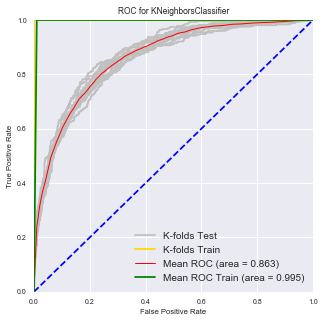

In [334]:
knn = KNeighborsClassifier(n_neighbors=61, 
                           weights="distance", 
                           metric="euclidean", 
                           algorithm= "brute")

classifier_ROC.append(KfoldPlot(new_data,y_label,knn,13))

## Logistic Regression

Logistic Regression GridsearchCV

parametersOptions = {'penalty':['l1','l2'], 
                     'C':[0.1,1,10,100], 
                     'tol':[0.1, 0.01], 
                     'solver':['liblinear','saga'],
                     'max_iter': [100],
                     'random_state':[5,10,15,20,25,30,35,40,45,50]} #define the model parameters to choose from
                     
GS_lr = GridSearchCV(LogisticRegression(), parametersOptions, cv=3, verbose=10, scoring='roc_auc') 
GS_lr.fit(new_data, y_label)
logreg = LogisticRegression(**GS_lr.best_params_) 

The best Parameters for the model are:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'random_state': 5, 'solver': 'liblinear', 'tol': 0.01}
AUC score with the chosen parameters:  0.8511131379015212

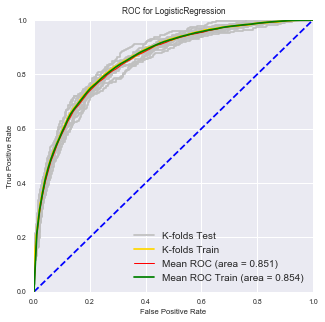

In [335]:
# Using the best Parameters found by gridsearch

clf = LogisticRegression(# ---The regularization hyperparameters---
                         penalty="l2", # As shown above - l1 stands for abs distance, l2 stands for quad_distances
                         C=0.1, # Inverse regularization parameter, larger C means less regularization.
                         solver='liblinear', # Algorithm to use in the optimization problem
                         # ---The Optimization parameters---
                         tol=0.01, # Stopping critiria
                         max_iter=100,
                         random_state=5) # For some optimization algorithms, the algorithm solves it with iterations.

classifier_ROC.append(KfoldPlot(new_data,y_label,clf,13))

## Random Forest

Randon Forest GridsearchCV

parametersOptions = {'n_estimators' : [3,7,15,30,50,100,150,190,220,240,270,300], 
                     'max_features':['auto', 'sqrt', 'log2'],
                     'max_depth' : [2,3,4,5], 
                     'criterion' :['gini', 'entropy']}    

GS_rf = GridSearchCV(RandomForestClassifier(), parametersOptions, cv=5, scoring='roc_auc',verbose=10) 
GS_rf.fit(new_data, y_label)
randfor = RandomForestClassifier(**GS_rf.best_params_, random_state=42) 

The best Parameters for the model are:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}

AUC score with the chosen parameters:  0.8324322787108838

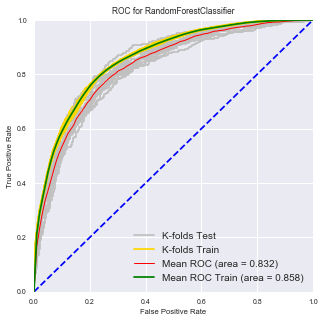

In [336]:
randfor= RandomForestClassifier(n_estimators=150, 
                        max_features= 'sqrt',
                        max_depth= 5, 
                        criterion= 'entropy')

classifier_ROC.append(KfoldPlot(new_data,y_label,randfor,13))

## ANN

ANN GridsearchCV

parameters = {'activation' : ["relu"],
              'hidden_layer_sizes' : [(5),(30), (128),(50,50)],
              'batch_size' : [10, 50],
              'max_iter': [1500],
              'learning_rate_init' : [0.1, 0.01],
              'random_state':[10,30,50]}

GS_ann = GridSearchCV(MLPClassifier(), parameters, cv=10, scoring='roc_auc',n_jobs=-1, verbose=10) 
GS_ann.fit(new_data, y_label)
ann = MLPClassifier(**GS_ann.best_params_) 


The best Parameters for the model are:  {'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': 5,'learning_rate_init': 0.01, 'max_iter': 1500, 'random_state': 50}

AUC score with the chosen parameters:  0.8658156257564513

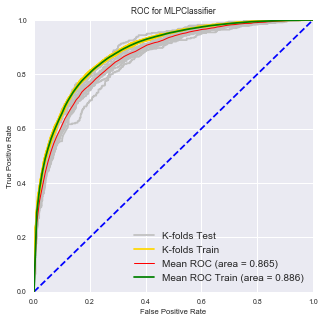

In [337]:
ann = MLPClassifier(activation= "relu",
                    batch_size=  10,
                    hidden_layer_sizes = 5,
                    learning_rate_init = 0.01,
                    max_iter= 1500,
                    random_state=50)

classifier_ROC.append(KfoldPlot(new_data,y_label,ann,13))

After calculating and displaying the ROC curve for each model, we decided to display all the models together and create a table containing the train AUC, the validation AUC, is the model overfitted ( calculated by (train AUC - validation AUC) > 0.05. this threshold was chosen as a general good estimator), and the balanced AUC (described in the K-Fold function).

|                        |   Train accuracy |   AUC (Validation Accuracy) |    Balanced Trainset Accuracy | Overfit-Yes/No   |
|------------------------|------------------|-----------------------------|-------------------------------|------------------|
| KNeighborsClassifier   |         0.994949 |                    0.862542 |                      0.522955 | Yes              |
| LogisticRegression     |         0.854044 |                    0.85057  |                      0.566397 | No               |
| RandomForestClassifier |         0.858341 |                    0.832135 |                      0.413777 | No               |
| MLPClassifier          |         0.885713 |                    0.865357 |                      0.577304 | No               |


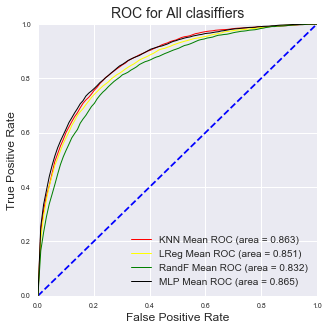

In [338]:
plt.figure(figsize=(5,5))
color=['red','yellow', 'green', 'black']
classifier_names=['KNN ','LReg ','RandF ','MLP ']
plt.plot([0, 1], [0, 1], color='blue',linestyle='--')
headers=['','Train accuracy','AUC (Validation Accuracy)',' Balanced Trainset Accuracy', 'Overfit-Yes/No']
table_list=[]
for i in range(len(classifier_ROC)):    
    plt.plot(classifier_ROC[i][1], classifier_ROC[i][0], color=color[i], label= classifier_names[i]+'Mean ROC (area = %0.3f)' % classifier_ROC[i][2], linewidth=1.0)
    table_list.append([classifier_ROC[i][3],classifier_ROC[i][4],classifier_ROC[i][2], classifier_ROC[i][5]])
    if classifier_ROC[i][4] - classifier_ROC[i][2] >0.05:
        table_list[i].append('Yes')
    else:
        table_list[i].append('No')
print(tabulate(table_list, headers, tablefmt="github"))

    # plot ROC graph for a chosen classifier with ROC for each fold and mean ROC highlited and printed
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC for All clasiffiers', fontdict={'fontsize':14})
plt.legend(prop={'size':10},loc="lower right")
plt.show()

Analyzing the results, we can notice the the ANN model had the best AUC, Thus a higher chance of predicting correctly. More so, we can see that the KNN model is over fitted, giving almost a 100% chance of predicting correctly for the train dataset, while having a much lower chance for unknown data (validation dataset). To fix this, we would recommend using more neighbors (larger n_neighbors), thus getting a smoother function line for the model and getting less variance.  

We can also notice that the balanced AUC is close to 0.5 for all models- indicating bad models. We can explain this with the imbalanced label distribution we noticed during the data exploration. The model has less '1' labels to train on, thus the higher the chances the model would predict '0', although the actual value is '1'. By giving this a penalty, we bring the model to an almost random state. To fix this, we created a balanced data set (randomly removed rows with '0'. In this case the model would train on a balanced data set and not favor '0' predictions), which is displayed furthur in the code. 

## Confusion matrix for ANN

We have chosen randomly the ANN model to display its confusion matrix (notice that the y-axis is actual and the x-axis i prediction): 

-The top left corner represents True Negative - the amount of correct '0' predictions

-The bottom right corner represents True Positive- the amount of correct '1' predictions

-The bottom left corner represents False Negative - the amount of incorrect '0' predictions

-The top right corner represents False Positive - the amount of incorrect '1' predictions

In [339]:
def draw_conf_matrix(y_test, y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, fmt='d',annot=True,cmap="YlGnBu")
    recall = recall_score(y_test,y_pred, average=None)
    precision = precision_score(y_test,y_pred, average=None)
    print('The accuracy score  of the model is: ',accuracy_score(y_test,y_pred))
    print('The ability of the model to find all 0 (negitive) samples is (recall): ', recall[0])
    print('The ability of the model to find all 1 (positive) samples is: ', recall[1])
    print('The ability of the model not to label as positive(1) a sample that is negative(0)-precision: ',precision[0])

The accuracy score  of the model is:  0.8480319621189701
The ability of the model to find all 0 (negitive) samples is (recall):  0.9684578696343402
The ability of the model to find all 1 (positive) samples is:  0.43174324027258737
The ability of the model not to label as positive(1) a sample that is negative(0)-precision:  0.8548894128213764


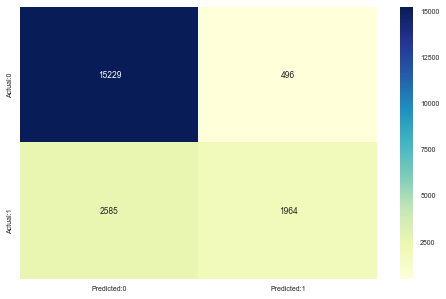

In [340]:
y_pred_ann = ann.predict(new_data)
draw_conf_matrix(y_label, y_pred_ann)


As mentioned and estimated before, we can see that the model ability to classify correctly negative samples is low, thus related to the distribution of the labels (to many '0' labels compared '1' in the train data set- unbalanced data). To deal with this problem we balanced the label count by randomly dropping rows that are labeled '0' and retrained the model.

# Test accuracy

In [341]:
# The best AUC belongs to the ANN model, therefore we use the ANN model for test predictions

test_ann = MLPClassifier(activation= "relu",
                    batch_size=  10,
                    hidden_layer_sizes = 5,
                    learning_rate_init = 0.01,
                    max_iter= 1500,
                    random_state=50)

test_ann.fit(new_data,y_label)
test_predict = test_ann.predict_proba(new_test)[:,1]
df_test_predict = pd.DataFrame(test_predict)
df_test_predict.rename(columns = {0:'pred_proba'}, inplace = True)
df_test_predict = pd.DataFrame(df_test_predict)
df_test_predict.to_csv("Submission_37.csv") #write to a new csv file

# Trying the selected model with balanced data

## This section is not part of the project flow!!! 

At this part we wanted to compare our previus results with new results including balanced data.
At the Exploration part we noticed that the data is imbalanced and could affect the abbility of the models to learn properly. Because the dimensionality of the problem is not to big (as mention before) we can afford to lose data, and this is why we deleted some of the data to balance the clasifications. On this "new data" we did the same processes as the original data, and hoped to get better results.


### Pre-Procesing

In [342]:
size_clf1=len(df_train2[df_train2['label']==1])
size_clf0=len(df_train2[df_train2['label']==0])

#defining new data frame
df_train_2= df_train2.drop(df_train2[df_train2['label'] == 0].sample(size_clf0-size_clf1).index)


Number 1 clasifications: 5240
Number 0 clasifications: 5240


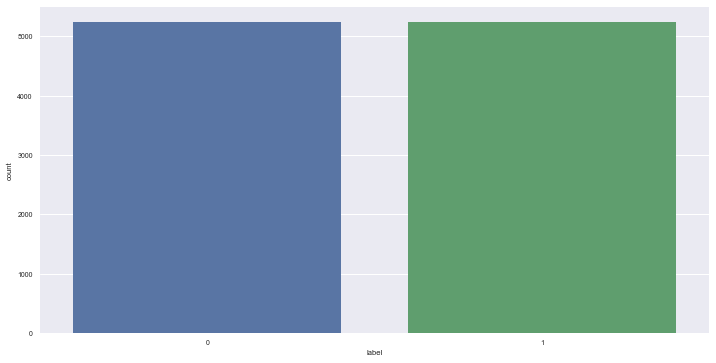

In [343]:
y = df_train_2.label  
sns.countplot(y)
z,o=y.value_counts()
print('Number 1 clasifications:', o)
print('Number 0 clasifications:', z)


In [344]:

df_train_2['13']=df_train_2['13'].replace(to_replace='unknown',value=np.nan)
df_train_2.dropna(subset=['13'],  inplace=True)

df_train_2['14']=df_train_2['14'].apply(slice_str)
df_train_2['13']=df_train_2['13'].apply(to_int)

corrMatrix_2=df_train_2.corr()
# Feature selection- correlation over 0.88
columns = np.full((corrMatrix_2.shape[0],), True, dtype=bool)
for i in range(corrMatrix_2.shape[0]):
    for j in range(i+1, corrMatrix_2.shape[0]):
        if abs(corrMatrix_2.iloc[i,j]) >= 0.88:
            column= f'{j}'
            if columns[j]:
                columns[j]= False
                df_train_2=df_train_2.drop([column],axis=1)
df_train_2.shape


(10418, 21)

In [345]:
#handeling the null values for the numeric columns

numeric_columns_2 =df_train_2.select_dtypes(include=['number']).drop(['label','13','22','9'], axis = 1).columns

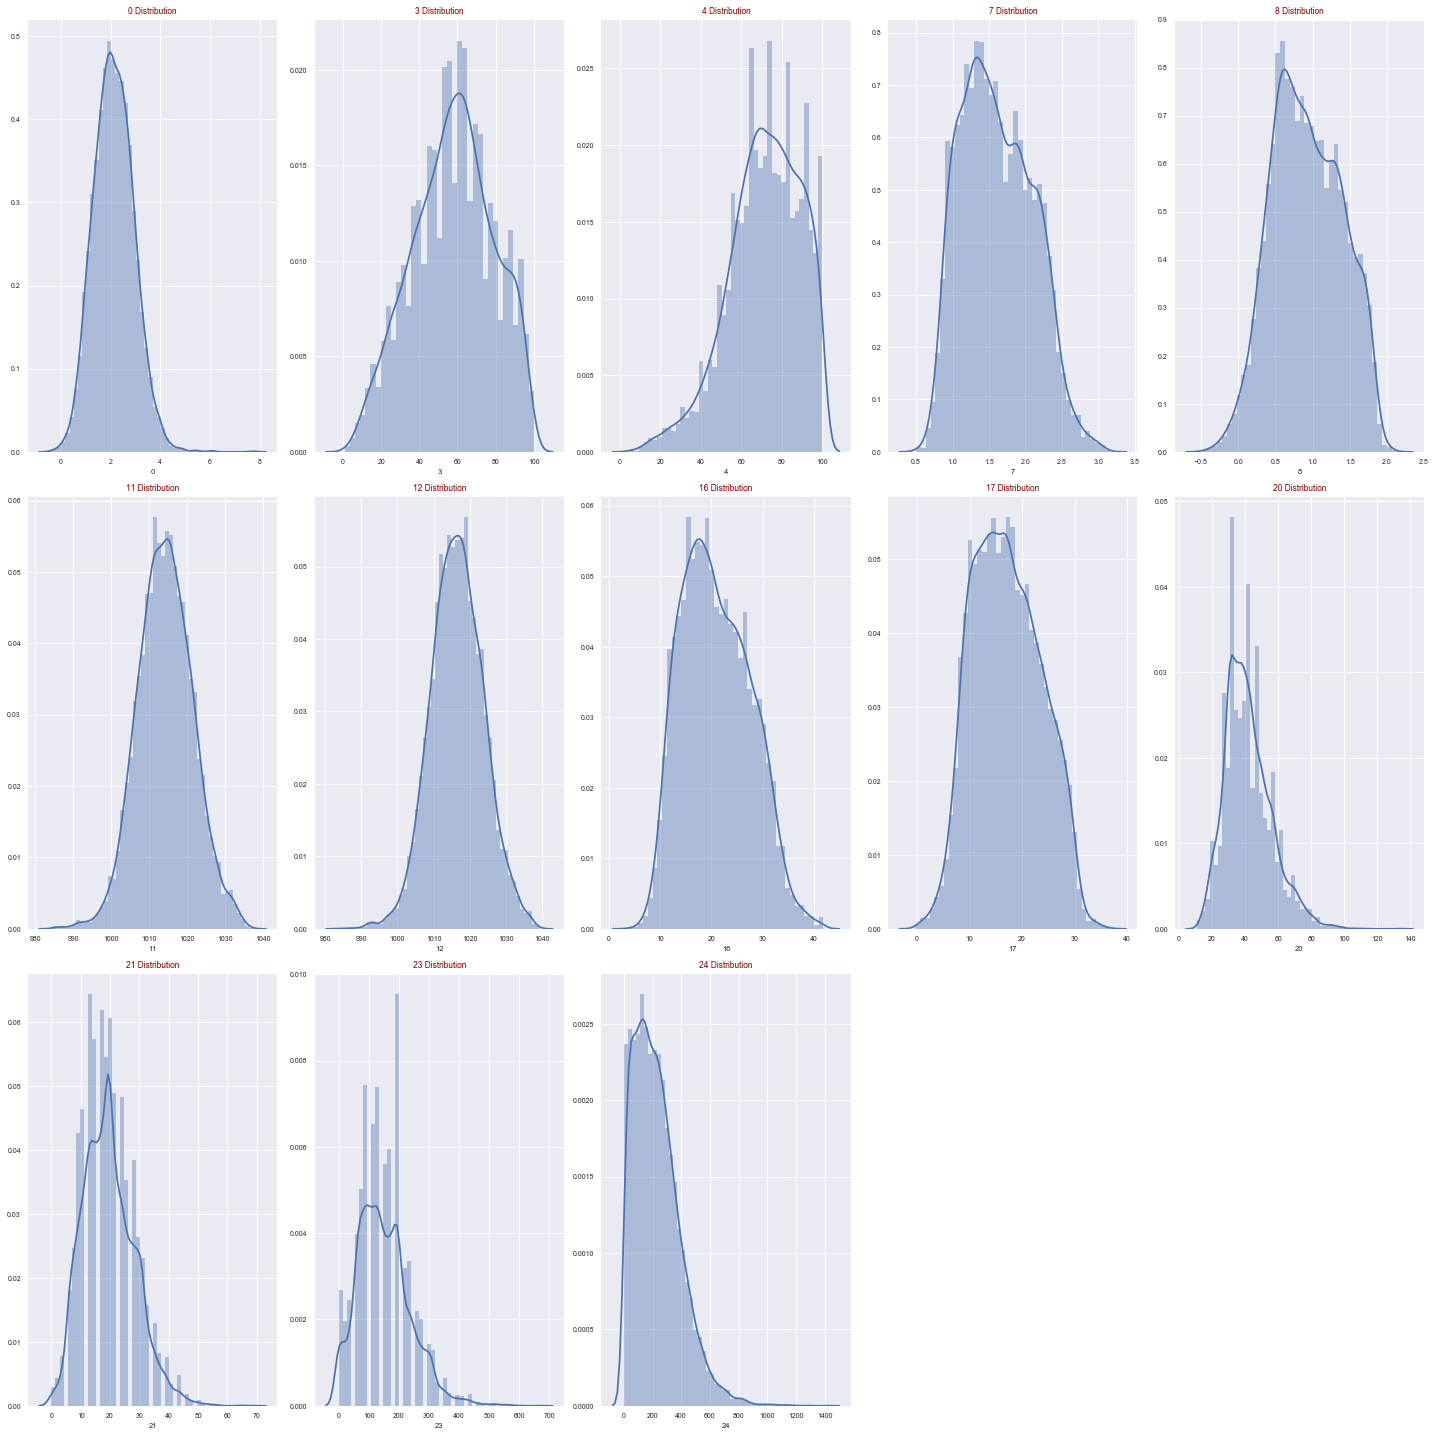

In [346]:
draw_histograms1(df_train_2,df_train_2[numeric_columns_2].columns,3,5)

In [347]:
# drop outliers for normal distrebution columns using standerd deviation 
#df_train_2 = df_train_2[(np.abs(stats.zscore(df_train_2[['11','12','0']])) < 3).all(axis = 1)]
df_train=df_train[df_train[['11','12','0']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


In [348]:
# drop outliers for normal distrebution columns using IQR
new_Q1 = df_train_2[['24','23','21','20','17','16','8','7','4','3']].quantile(0.25)
new_Q3 = df_train_2[['24','23','21','20','17','16','8','7','4','3']].quantile(0.75)
new_IQR = new_Q3 - new_Q1
df_train_2 = df_train_2[~((df_train_2[['24','23','21','20','17','16','8','7','4','3']] < (new_Q1 - 1.5 * new_IQR)) |(df_train_2[['24','23','21','20','17','16','8','7','4','3']] > (new_Q3 + 1.5 * new_IQR))).any(axis=1)]



In [349]:
# Dealing with null values
df_train_2[numeric_columns_2] =df_train_2[numeric_columns_2].fillna(df_train_2[numeric_columns_2].mean())


In [350]:
# normalizing the data between 0-1
scaler_2 = StandardScaler()
df_train_2[numeric_columns_2] = scaler_2.fit_transform(df_train_2[numeric_columns_2])

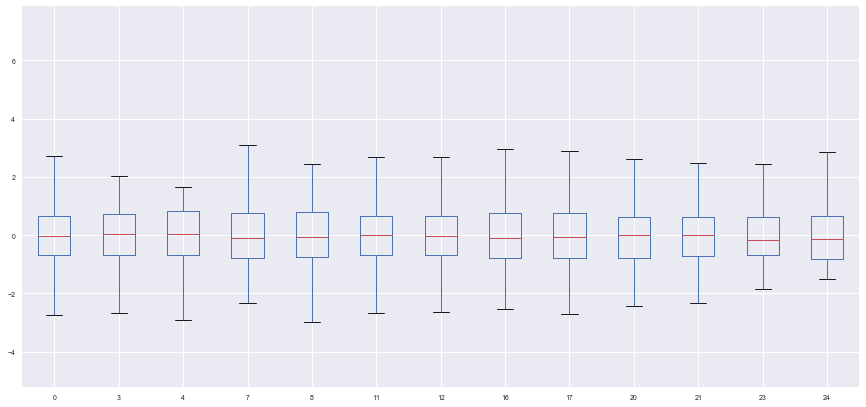

In [351]:
df_train_2[numeric_columns_2].boxplot(figsize = (15,7))

In [352]:
#one hot encoding for the categirial data
df_train_2= dummies(df_train_2,['5','18','19','13','6','22','9']) 

In [353]:
#defining data and labels
y_label_2= np.array(df_train_2['label'])
data_2=df_train_2.drop(['label'], axis = 1)

In [354]:
# implementing the pca on data
pca2_1 = PCA(n_components = 8)
pca2_1.fit(data_2.loc[:, :'24'])
new_data2_1 = pca2_1.transform(data_2.loc[:, :'24'])


pca2_2 = PCA(n_components = 66)
pca2_2.fit(data_2.loc[:, '5_A':])
new_data2_2= pca2_2.transform(data_2.loc[:, '5_A':])


print (sum(pca2_1.explained_variance_ratio_) )#make sure we reach the 95%
print(sum(pca2_2.explained_variance_ratio_) )#make sure we reach the 95%

0.962661078315708
0.952882706343965


In [355]:
#data 2
new_data_2= np.concatenate((new_data2_1,new_data2_2),axis=1)

In [356]:
# adding a new feature
x2 = new_data_2[:,16]
y2 = new_data_2[:,7]
new_train_column_2= np.multiply(x2,y2)
new_data_2 = np.concatenate((new_data_2, np.vstack(new_train_column_2)), axis = 1)

In [357]:
classifier_ROC_2=[]

#ANN GridsearchCV

parameters_2 = {'activation' : ["relu"],
              'hidden_layer_sizes' : [(5),(30), (128),(50,50)],
              'batch_size' : [10, 50],
              'max_iter': [1500],
              'learning_rate_init' : [0.1, 0.01],
              'random_state':[10,30,50]}

GS_ann_2 = GridSearchCV(MLPClassifier(), parameters_2, cv=10, scoring='roc_auc',n_jobs=-1, verbose=10) 
GS_ann_2.fit(new_data_2, y_label_2)
ann_2 = MLPClassifier(**GS_ann_2.best_params_) 




print(GS_ann_2.best_params_)

{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': 5, 'learning_rate_init': 0.01, 'max_iter': 1500, 'random_state': 50}

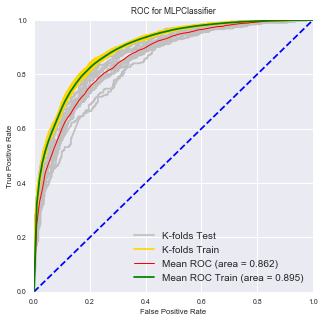

In [358]:
#Trying the selected model(ann) on the new data
ann_2 = MLPClassifier(activation= "relu",
                    batch_size=  10,
                    hidden_layer_sizes = 5,
                    learning_rate_init = 0.01,
                    max_iter= 1500,
                    random_state=50)

classifier_ROC_2.append(KfoldPlot(new_data_2,y_label_2,ann_2,13))

The accuracy score  of the model is:  0.8049767347764516
The ability of the model to find all 0 (negitive) samples is (recall):  0.7901580316063213
The ability of the model to find all 1 (positive) samples is:  0.8201350521792511
The ability of the model not to label as positive(1) a sample that is negative(0)-precision:  0.8179747359701801


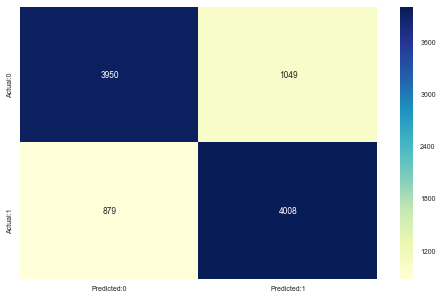

In [359]:
y_pred_ann_2 = ann_2.predict(new_data_2)
draw_conf_matrix(y_label_2, y_pred_ann_2)

We can see that clasification (1 or 0) is more balanced compared to the original model, the ability in this model to clasiffy to 1 correctely is 80.6% compare to 52.8% at the original, this is big improvement. Althogh we trained the model with way less data, we see that this model is more accurate and רeliablee than the original.